In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
filename = "/media/sf_VBox_Shared/London/accelerometer_5second/__016563_2014-08-08 12-02-19.bin_day1.csv"
data = pd.read_csv(filename, index_col='timestamp', parse_dates=True)

In [4]:
data.head(10)

,acceleration,anglex,angley,anglez,invalid
timestamp,,,,,
2014-08-01 04:00:00,0.014778,27.403869,39.648207,-38.117174,0
2014-08-01 04:00:05,0.014978,27.407743,39.603882,-38.158723,0
2014-08-01 04:00:10,0.013872,27.428900,39.538962,-38.206537,0
2014-08-01 04:00:15,0.015469,27.417167,39.553611,-38.201570,0
2014-08-01 04:00:20,0.014622,27.420342,39.680349,-38.070763,0
2014-08-01 04:00:25,0.014653,27.416003,39.569062,-38.186979,0
2014-08-01 04:00:30,0.015118,27.413793,39.574222,-38.183626,0
2014-08-01 04:00:35,0.014717,27.430463,39.631316,-38.111813,0
2014-08-01 04:00:40,0.014902,27.473754,39.548319,-38.159240,0


In [5]:
data.index

DatetimeIndex(['2014-08-01 04:00:00', '2014-08-01 04:00:05',
               '2014-08-01 04:00:10', '2014-08-01 04:00:15',
               '2014-08-01 04:00:20', '2014-08-01 04:00:25',
               '2014-08-01 04:00:30', '2014-08-01 04:00:35',
               '2014-08-01 04:00:40', '2014-08-01 04:00:45',
               ...
               '2014-08-02 03:59:10', '2014-08-02 03:59:15',
               '2014-08-02 03:59:20', '2014-08-02 03:59:25',
               '2014-08-02 03:59:30', '2014-08-02 03:59:35',
               '2014-08-02 03:59:40', '2014-08-02 03:59:45',
               '2014-08-02 03:59:50', '2014-08-02 03:59:55'],
              dtype='datetime64[ns]', name='timestamp', length=17280, freq=None)

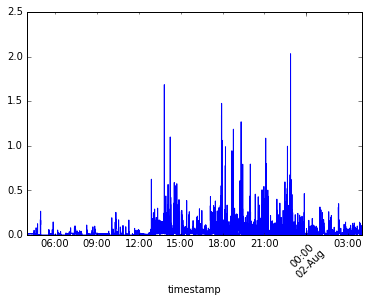

In [8]:
data['acceleration'].plot()
xticks(rotation=45);

In [11]:
data['date_time'] = data.index

/home/dafne/anaconda2/envs/ucl/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


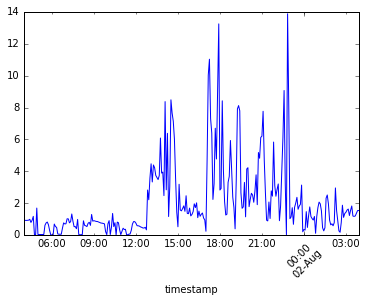

In [12]:
data_r = data.resample('5Min', how='sum')

data_r['acceleration'].plot()
xticks(rotation=45);

# Merge data from patients and annotation

In [13]:
annotations = pd.read_csv('/media/sf_VBox_Shared/London/data_annotations.csv')

In [14]:
fileAnnotations = annotations[annotations['filename']=='__016563_2014-08-08 12-02-19.bin_day1.RData']

In [17]:
for row in fileAnnotations[['ddate1', 'stime', 'etime', 'activity', 'filename']].as_matrix():
    rStartStr = row[0].strip() + ' ' + row[1].strip()
    rStart = datetime.datetime.strptime(rStartStr, '%d/%m/%Y %H:%M:%S')

    rEndStr = row[0].strip() + ' ' + row[2].strip()
    rEnd = datetime.datetime.strptime(rEndStr, '%d/%m/%Y %H:%M:%S')

    data.loc[(data.index < rEnd) & (data.index > rStart), 'Activity'] = row[3]

In [18]:
filepath = '/media/sf_VBox_Shared/London/accelerometer_5second/'
def loadData(name):
    try:
        name = name.replace('RData', 'csv')
        filename = filepath + name
        data = pd.read_csv(filename, index_col='timestamp', parse_dates=True)
        return data
    except:
        # print 'Fine not found: ',name
        return None

In [21]:
def parseDate(dateStr):
    try:
        return datetime.datetime.strptime(dateStr, '%d/%m/%Y %H:%M:%S')
    except:
        # hack -- 
        dateStr = dateStr.replace('24:','00:')
        dateStr = dateStr.replace('25:','01:')
        dateStr = dateStr.replace('27:','03:')
        return datetime.datetime.strptime(dateStr, '%d/%m/%Y %H:%M:%S')

def addAnnotations(data, fileAnnotations):
    for row in fileAnnotations[['ddate1', 'stime', 'etime', 'activity', 'filename']].as_matrix():
        rStart = parseDate(row[0].strip() + ' ' + row[1].strip())
        rEnd   = parseDate(row[0].strip() + ' ' + row[2].strip())
        data.loc[(data.index < rEnd) & (data.index > rStart), 'Activity'] = row[3]
        
    return data

In [23]:
byName = annotations.groupby('filename')
for name, fileAnnotations in byName:
    # Load data
    df = loadData(name)
    
    if df is not None:    
        # Add annotations
        df = addAnnotations(df, fileAnnotations)

        # Save file
        df.to_csv(filepath+'merged/' + name.replace('RData','csv'))

# Load data from asimilated patients

In [24]:
# filename = 'data/vincent/merged/__016570_2014-08-12 15-23-30.bin_day1.csv'
filename = filepath+'merged/__018643_2014-07-30 15-07-46.bin_day1.csv'
df = pd.read_csv(filename, index_col='timestamp', parse_dates=True)

In [25]:
df.head(5)

,acceleration,anglex,angley,anglez,invalid,Activity
timestamp,,,,,,
2014-07-23 04:00:00,0.004112,-78.420989,6.355486,-9.638339,0,NaN
2014-07-23 04:00:05,0.003581,-78.404221,6.386509,-9.637757,0,Sleepingandresting(includingsickinbed)
2014-07-23 04:00:10,0.004212,-78.389250,6.414209,-9.637237,0,Sleepingandresting(includingsickinbed)
2014-07-23 04:00:15,0.004123,-78.478347,6.242389,-9.644912,0,Sleepingandresting(includingsickinbed)
2014-07-23 04:00:20,0.003927,-78.395513,6.400891,-9.638600,0,Sleepingandresting(includingsickinbed)


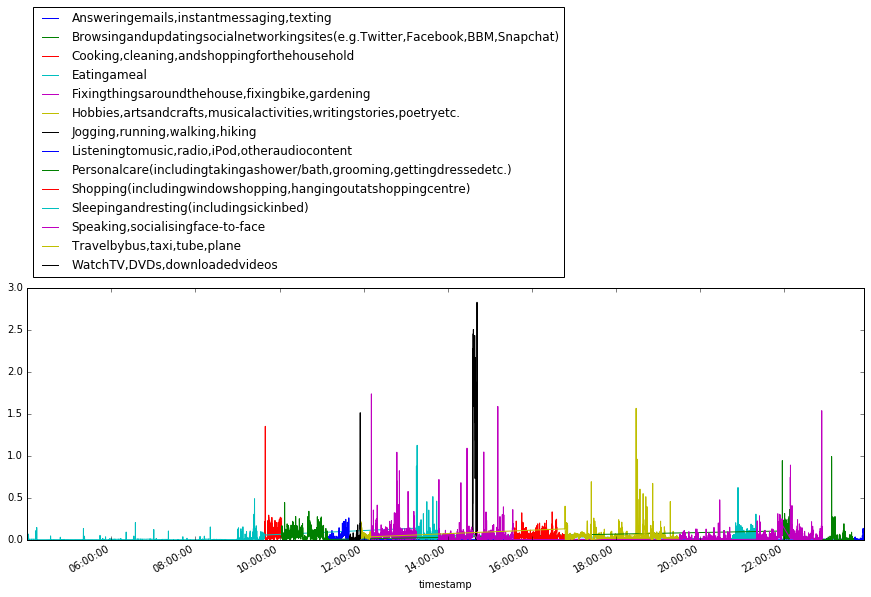

In [37]:
byAct = df.groupby('Activity')
fig, ax = plt.subplots(figsize=(15,5))
for act,dfa in byAct:
    dfa['acceleration'].plot(label=act)
legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3);